# 합성곱 연산

In [1]:
import numpy as np
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

In [2]:
w_r = np.flip(w)
w_r

array([3, 5, 1, 2])

In [10]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)))

[63]
[48]
[49]
[28]
[21]
[20]


---
#### 합성곱

In [11]:
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

---
#### 교차상관

In [12]:
from scipy.signal import correlate
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

---
#### 패딩과 스트라이드
* 풀 패딩은 원본 배열의 원소의 연산 참여도를 동일하게 만든다

In [13]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

* 세임 패딩은 출력 배열의 길이를 원본 배열의 원소의 길이와 동일하게 만든다

In [16]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

* 스트라이드는 미끄러지는 간격을 조정한다

---
#### 2차원 배열에서 합성곱 수행

In [21]:
x = np.array([[1,2,3], 
              [4,5,6], 
              [7,8,9]])
w = np.array([[2,0], 
              [0,0]])
from scipy.signal import correlate2d
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

* 2차원 배열에서 Same Padding

In [22]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

(1, 3, 3, 1)


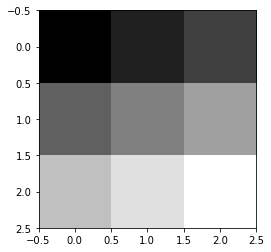

In [27]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]], 
                      [[4],[5],[6]], 
                      [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='gray')

In [39]:
# 1차원 배열
a = np.array([1,2])
print(a,'\n')
print('len(a): ', len(a))
print('a.ndim: ', a.ndim)
print('a.shape: ', a.shape)

[1 2] 

len(a):  2
a.ndim:  1
a.shape:  (2,)


In [42]:
# 2차원 배열
a = np.array([[1,2], 
              [3,4]])
print(a, '\n')
print('len(a): ', len(a))
print('a.ndim: ', a.ndim)
print('a.shape: ', a.shape)

[[1 2]
 [3 4]] 

len(a):  2
a.ndim:  2
a.shape:  (2, 2)


In [43]:
# 3차원 배열
a = np.array([[[1,2],
               [3,4]],
              
              [[5,6],
               [7,8]]])
print(a, '\n')
print('len(a): ', len(a))
print('a.ndim: ', a.ndim)
print('a.shape: ', a.shape)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 

len(a):  2
a.ndim:  3
a.shape:  (2, 2, 2)


In [50]:
# 4차원 배열
a = np.array([[[[1],
                [2]],
               
               [[3],
                [4]]],
              
              [[[5],
                [6]],
               
               [[7],
                [8]]]])
print(a, '\n')
print('len(a): ', len(a))
print('a.ndim: ', a.ndim)
print('a.shape: ', a.shape)

[[[[1]
   [2]]

  [[3]
   [4]]]


 [[[5]
   [6]]

  [[7]
   [8]]]] 

len(a):  2
a.ndim:  4
a.shape:  (2, 2, 2, 1)


In [52]:
a = np.array([[[[1],[2],[3]],
               [[4],[5],[6]],
               [[7],[8],[9]]]])
print(a, '\n')
print('len(a): ', len(a))
print('a.ndim: ', a.ndim)
print('a.shape: ', a.shape)

[[[[1]
   [2]
   [3]]

  [[4]
   [5]
   [6]]

  [[7]
   [8]
   [9]]]] 

len(a):  1
a.ndim:  4
a.shape:  (1, 3, 3, 1)


conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


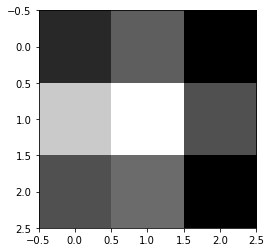

In [62]:
weight = np.array([[[[1.],[1.]]],[[[1.],[1.]]]])
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print('conv2d.shape', conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()